# RGR
## House Prices
[Kaggle competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
> It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

##### Made by Chaikovsky V.V.
Group DA-82

__KPI 2021__

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns", 1000)

## Loading data
First of all, we need to read the test and train data into pandas dataframes we are going to work with

In [2]:
data_test = pd.read_csv("test.csv")
data_train = pd.read_csv("train.csv")

Observing amount of rows (features) and columns (records)

In [3]:
print("Test shape:", data_test.shape)
print("Train shape:", data_train.shape)

Test shape: (1459, 80)
Train shape: (1460, 81)


# Extracting categorical (object) and numerical data
For convinient EDA let's extract categorical and numerical features in a separate dataframes\
We'll drop target column `SalePrice` and uninformative column `Id`

In [4]:
TARGET_COLUMN = "SalePrice"

In [5]:
numerical_df = [x for x in data_train.columns if data_train.dtypes[x] != 'object']
numerical_df.remove("SalePrice")
numerical_df.remove("Id")
categorical_df = [x for x in data_train.columns if data_train.dtypes[x] == 'object']

# Observing samples
Let's take a few samples of train data

In [6]:
data_train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1407,1408,20,RL,NaN,8780,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1985,1985,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,625,Unf,0,208,833,GasA,Ex,Y,SBrkr,833,0,0,833,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,112000
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,None,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036,LwQ,184,140,1360,GasA,Gd,Y,SBrkr,1360,1360,392,3112,1,1,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,Unf,2,795,TA,TA,Y,0,16,552,0,0,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
1154,1155,60,RL,NaN,13700,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,2Story,7,6,1965,1988,Gable,CompShg,VinylSd,VinylSd,Stone,288.0,TA,TA,CBlock,TA,TA,Gd,ALQ,454,Unf,0,410,864,GasA,TA,Y,SBrkr,902,918,0,1820,0,0,1,2,4,1,Gd,8,Typ,2,Gd,Attchd,1965.0,Unf,2,492,TA,TA,Y,60,84,0,0,273,0,NaN,GdPrv,NaN,0,5,2008,WD,Normal,201800
1319,1320,20,RL,75.0,10215,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1954,1954,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,132.0,TA,TA,PConc,TA,TA,No,ALQ,492,Unf,0,372,864,GasA,Ex,Y,SBrkr,948,0,0,948,0,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1954.0,Unf,1,248,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,111000
179,180,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,100000
709,710,20,RL,NaN,7162,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,7,1966,1966,Gable,CompShg,HdBoard,HdBoard,BrkCmn,41.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,876,876,GasA,TA,Y,SBrkr,904,0,0,904,0,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1966.0,Unf,1,408,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,12,2008,WD,Abnorml,109900
146,147,30,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1Story,5,7,1931,1993,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,209,Unf,0,506,715,GasA,TA,Y,FuseA,875,0,0,875,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1931.0,Unf,1,180,Fa,TA,Y,48,0,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,105000
735,736,75,RM,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2.5Unf,7,7,1914,1970,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,TA,Mn,Rec,390,Unf,0,490,880,GasW,Fa,N,SBrkr,880,888,0,1768,0,0,1,1,2,1,TA,6,Typ,2,TA,Detchd,1914.0,Unf,2,320,TA,TA,N,0,341,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal,163000
261,262,60,RL,69.0,9588,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2007,2007,Gable,CompShg,CemntBd,CmentBd,Stone,270.0,Gd,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1482,1482,GasA,Ex,Y,SBrkr,1482,1092,0,2574,0,0,2,1,3,1,Ex,10,Typ,1,Gd,BuiltIn,2007.0,Fin,3,868,TA,TA,Y,0,148,0,0,0,0,NaN,NaN,NaN,0,11,2007,New,Partial,276000
1269,1270,50,RL,78.0,11344,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1.5Fin,5,5,1958,1958,Gable,CompShg,MetalSd,MetalSd,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,BLQ,460,Unf,0,

# Observing data types
Now, let's see types of features

In [7]:
data_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


# Observing uniques
How many variants of categorical features is there

In [8]:
data_train.select_dtypes("object").apply(pd.Series.nunique, axis=0)

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [9]:
data_test.select_dtypes("object").apply(pd.Series.nunique,axis=0)

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         1
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        5
BldgType          5
HouseStyle        7
RoofStyle         6
RoofMatl          4
Exterior1st      13
Exterior2nd      15
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           4
HeatingQC         5
CentralAir        2
Electrical        4
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        4
GarageCond        5
PavedDrive        3
PoolQC            2
Fence             4
MiscFeature       3
SaleType          9
SaleCondition     6
dtype: int64

# Both-side check for missing categorical values in test and train datasets
Let's also check in advance for difference in uniques so we can clear them lately

In [10]:
# flattens the list
def flatten(to_flatten):
    return [item for sublist in to_flatten for item in sublist]

# returns x - y
def list_diff(x,y):
    return [item for item in x if item not in y]

# returns list of categorical values that need to be
# removed from train and test to make them match
def unique_values_diff(train_df, test_df):
    uniques_train = train_df.select_dtypes("object").apply(pd.Series.nunique, axis=0)
    uniques_test = test_df.select_dtypes("object").apply(pd.Series.nunique, axis=0)
    
    difference = uniques_test - uniques_train
    
    need_to_be_cleared_in_test = list()
    need_to_be_cleared_in_train = list()
    
    
    for index, value in difference.items():
        if value != 0:
            valunique_train = train_df[index].unique()
            valunique_test = test_df[index].unique()
            
            cur_not_in_train = list_diff(valunique_test, valunique_train)
            cur_not_in_test = list_diff(valunique_train, valunique_test)
            
            print(f"Difference on [{index}]:" 
                  + f"\n\tMissing in train: {cur_not_in_train}\n\tMissing in test: {cur_not_in_test}")
            
            need_to_be_cleared_in_test.append(cur_not_in_train)
            need_to_be_cleared_in_train.append(cur_not_in_test)
    
    
    
    return (flatten(need_to_be_cleared_in_train), flatten(need_to_be_cleared_in_test))


remove_train, remove_test = unique_values_diff(data_train, data_test)

Difference on [Utilities]:
	Missing in train: [nan]
	Missing in test: ['NoSeWa']
Difference on [Condition2]:
	Missing in train: []
	Missing in test: ['RRNn', 'RRAn', 'RRAe']
Difference on [HouseStyle]:
	Missing in train: []
	Missing in test: ['2.5Fin']
Difference on [RoofMatl]:
	Missing in train: []
	Missing in test: ['Metal', 'Membran', 'Roll', 'ClyTile']
Difference on [Exterior1st]:
	Missing in train: [nan]
	Missing in test: ['Stone', 'ImStucc']
Difference on [Exterior2nd]:
	Missing in train: [nan]
	Missing in test: ['Other']
Difference on [Heating]:
	Missing in train: []
	Missing in test: ['OthW', 'Floor']
Difference on [Electrical]:
	Missing in train: []
	Missing in test: ['Mix', nan]
Difference on [GarageQual]:
	Missing in train: [nan]
	Missing in test: [nan, 'Ex']
Difference on [PoolQC]:
	Missing in train: [nan]
	Missing in test: [nan, 'Fa']
Difference on [MiscFeature]:
	Missing in train: [nan]
	Missing in test: [nan, 'TenC']


# Checking for duplicates
We also need to know whether we having duplicates in our data and decide should the duplicates stay in the training/testing set or not

In [11]:
def duplicates(data):
    return data[data.duplicated()]
    
duplicates(data_train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [12]:
duplicates(data_test)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


Lucky for us we don't have duplicates :)

# Target overview
Let's see the distribution plot of our target variable - `SalePrice`

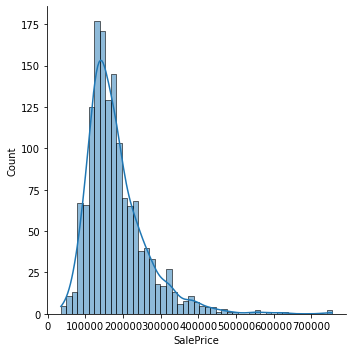

In [13]:
sns.displot(data_train[TARGET_COLUMN], kde=True)

### Relationship with some numerical variables

In [14]:
def pair_dist(df, target, other):
    data = pd.concat([df[target], df[other]], axis=1)
    data.plot.scatter(x=other, y=target, ylim=(0,1000000))

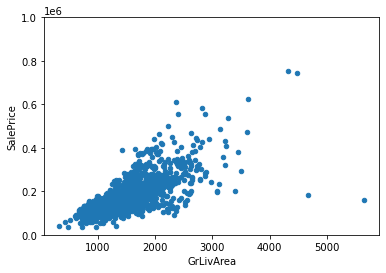

In [15]:
pair_dist(data_train, TARGET_COLUMN, "GrLivArea")

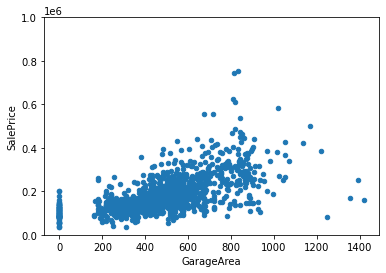

In [16]:
pair_dist(data_train, TARGET_COLUMN, "GarageArea")

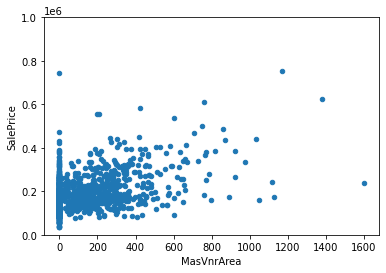

In [17]:
pair_dist(data_train, TARGET_COLUMN, "MasVnrArea")

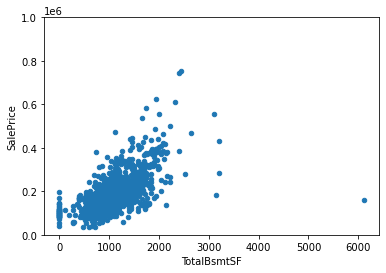

In [18]:
pair_dist(data_train, TARGET_COLUMN, "TotalBsmtSF")

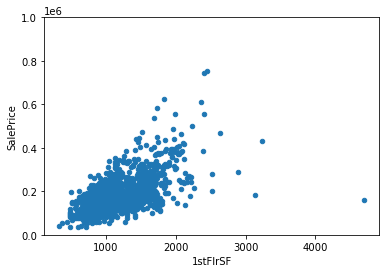

In [19]:
pair_dist(data_train, TARGET_COLUMN, "1stFlrSF")


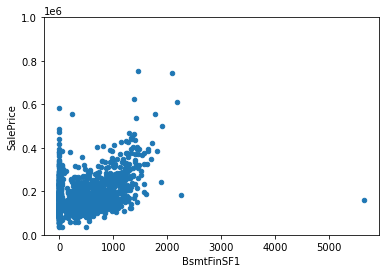

In [20]:
pair_dist(data_train, TARGET_COLUMN, "BsmtFinSF1")

We can see that some features are linearly related with `SalesPrice` like `TotalBsmtSF`, `GrLivArea` and `1stFlrSF` (positive relationship)

Also we see some strange record - outlier in the right down corner of the plots. We need to clean him before modeling, hope I won't forget it though ^^

### Relation with some categorical values

In [21]:
def pair_box(df, target, other):
    data = pd.concat([df[target], df[other]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=other, y=target, data=data)
    fig.axis(ymin=0, ymax=800000)

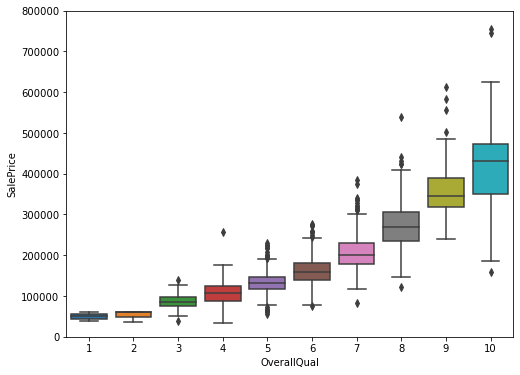

In [22]:
pair_box(data_train, TARGET_COLUMN, "OverallQual")

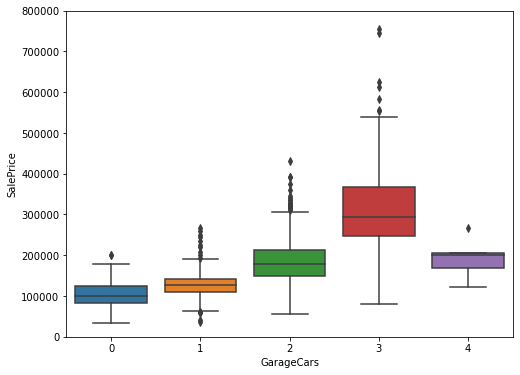

In [23]:
pair_box(data_train, TARGET_COLUMN, "GarageCars")

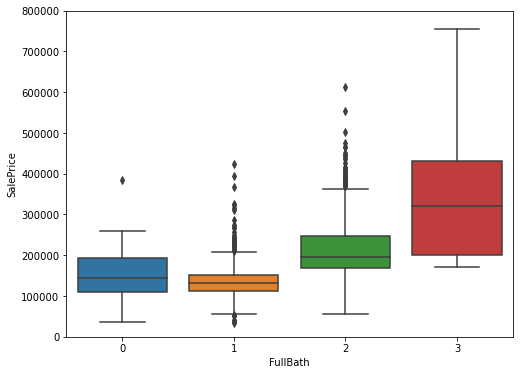

In [24]:
pair_box(data_train, TARGET_COLUMN, "FullBath")

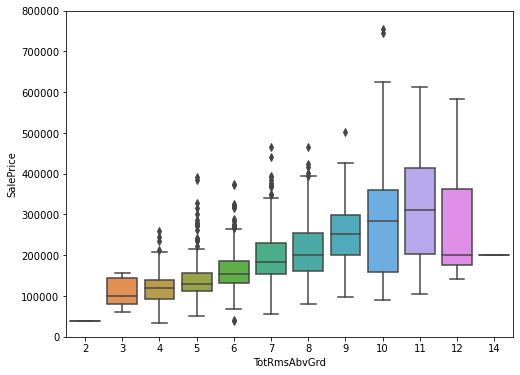

In [25]:
pair_box(data_train, TARGET_COLUMN, "TotRmsAbvGrd")

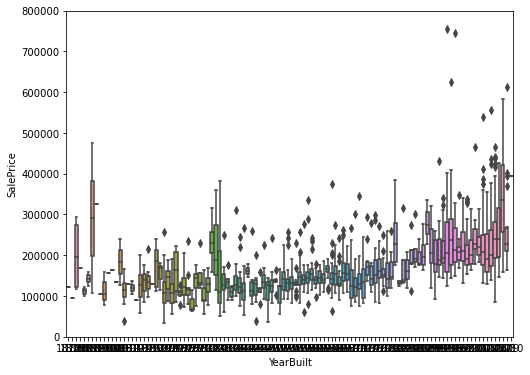

In [26]:
pair_box(data_train, TARGET_COLUMN, "YearBuilt")

In this case we see that `OverallQual` is also seem to be linearly related with target variable.  Also `SalePrice` has strong relation with `GarageCars`

# Correlations with target

Let's absolute correlations with the target variable
The more correlation coefficient we get the more the corresponding feature
will be influencing our model

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

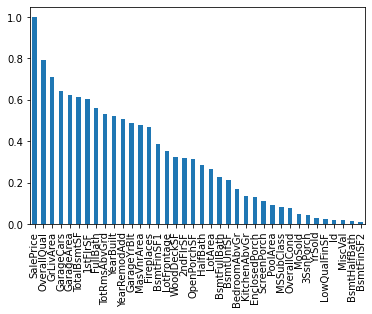

In [27]:
abs_cors = abs(data_train.corr()[TARGET_COLUMN]).sort_values(ascending=False)
abs_cors.plot.bar()
print(abs_cors)

# Heatmap
Heatmap shows us how each variable `i` correlated with another variable `j`.\
In our case, the redder "intersection cube" gets, the more two variables correlated with one another.

I have shown above corellation bar plot with target with absolute values.  

In case of target variable `Sale Price` it is good to consider picking the feature that have high correlation coefficient with target variable. 

But the features themselves can correlate with each other, and the more correlation coefficient between two features the less information we can get by including both features in test dataset (becase they conduct practically same information)

<AxesSubplot:>

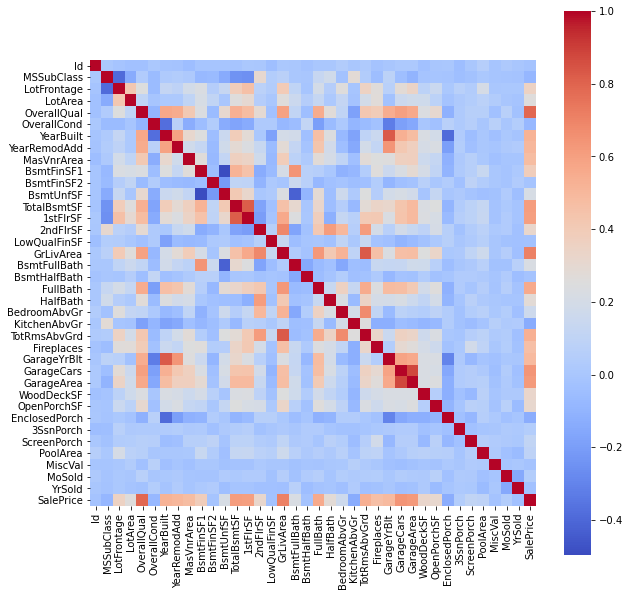

In [28]:
corr_mtrx = data_train.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_mtrx, square=True, cmap="coolwarm")

Let's now see the "hottest" candidates in modeling set

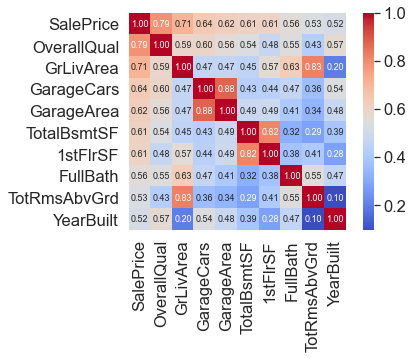

In [29]:
candidate_number = 10
cols = corr_mtrx.nlargest(candidate_number, 'SalePrice')['SalePrice'].index
small_corr_mtrx = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.5)

heatmap = sns.heatmap(small_corr_mtrx, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values, cmap="coolwarm")

Now we can make some conclusions:
1. `OverallQual`, `GrLivArea` and `GarageCars` have the largest coefficients, thus they will likely to get us good prediction results
2. Strongly correlated variables
    * `GrLivArea` and `TotRmsAbvGrd`
    * `GarageCars` and `GarageArea` (oh rly :))
    * `TotalBsmtSF` and `1stFlrSF`
    


# Percentage of missing values
It's important to check how much values we missing in each column\
To handle missing values, we can impute the them with another values (according to distributions)\
Features that missing *huge percentage* of values will be simple deleted

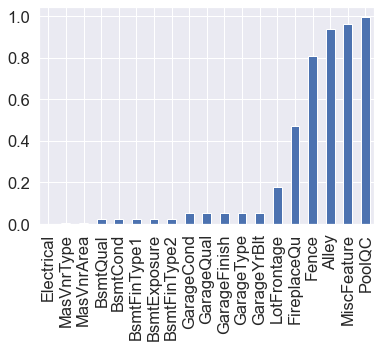

In [30]:
def missing_values_presents(missing):
    for name, val in missing.items():
        if val != 0:
            return True
    return False

def missing_values_bar(data):
    missing_data = data.isnull().sum()
    

    missing_data = missing_data[missing_data > 0]

    missing_data.sort_values(inplace=True)
    missing_data = pd.to_numeric(missing_data, downcast="float")
    
    if not missing_values_presents(missing_data):
        print("No missing values found")
        return
    
    rows = data.shape[0]
    
    for name, val in missing_data.items():
        percent = missing_data[name]/rows
        missing_data[name] = percent
        
    missing_data.plot.bar()
    
def missing_values_percentage_table(data):
    missing_total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([missing_total, percent], axis=1, keys=['Total_missing', 'Percentage'])
    return missing_data[missing_data["Percentage"] > 0]
    
missing_values_bar(data_train)

In [31]:
print(missing_values_percentage_table(data_train))

              Total_missing  Percentage
PoolQC                 1453    0.995205
MiscFeature            1406    0.963014
Alley                  1369    0.937671
Fence                  1179    0.807534
FireplaceQu             690    0.472603
LotFrontage             259    0.177397
GarageCond               81    0.055479
GarageType               81    0.055479
GarageYrBlt              81    0.055479
GarageFinish             81    0.055479
GarageQual               81    0.055479
BsmtExposure             38    0.026027
BsmtFinType2             38    0.026027
BsmtFinType1             37    0.025342
BsmtCond                 37    0.025342
BsmtQual                 37    0.025342
MasVnrArea                8    0.005479
MasVnrType                8    0.005479
Electrical                1    0.000685


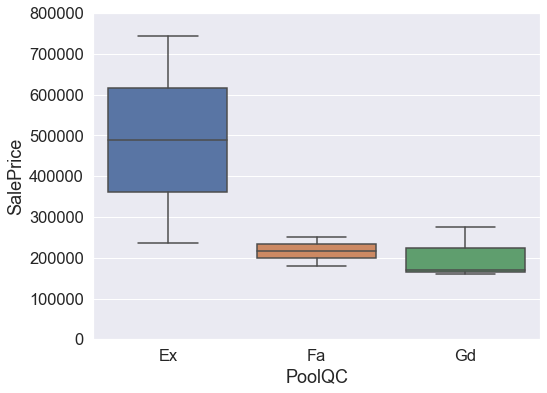

In [32]:
pair_box(data_train, TARGET_COLUMN, "PoolQC")

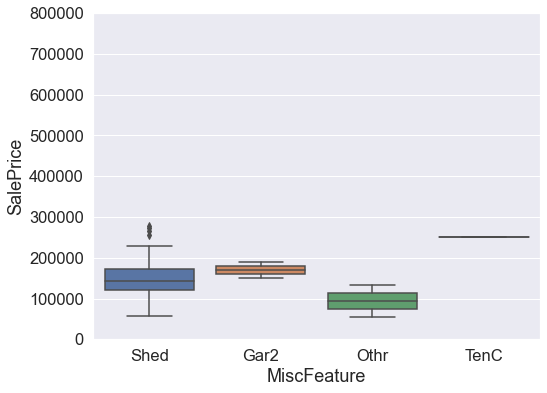

In [33]:
pair_box(data_train, TARGET_COLUMN, "MiscFeature")

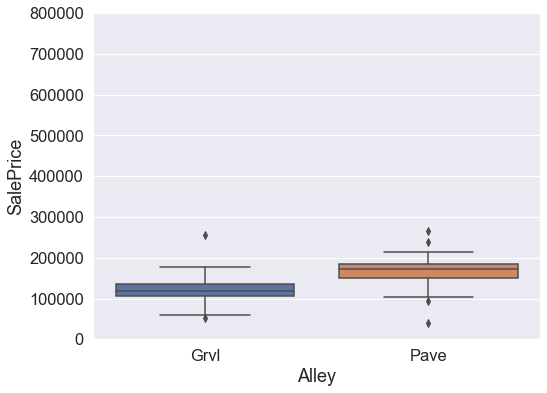

In [34]:
pair_box(data_train, TARGET_COLUMN, "Alley")

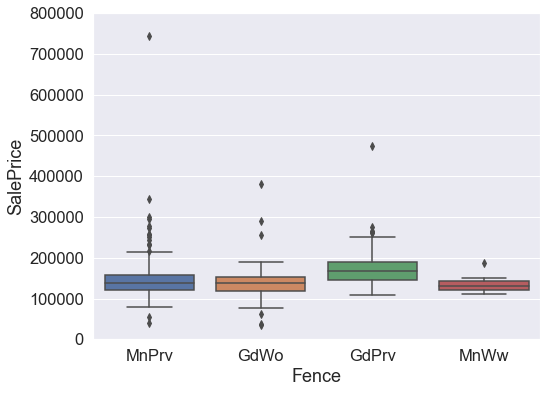

In [35]:
pair_box(data_train, TARGET_COLUMN, "Fence")

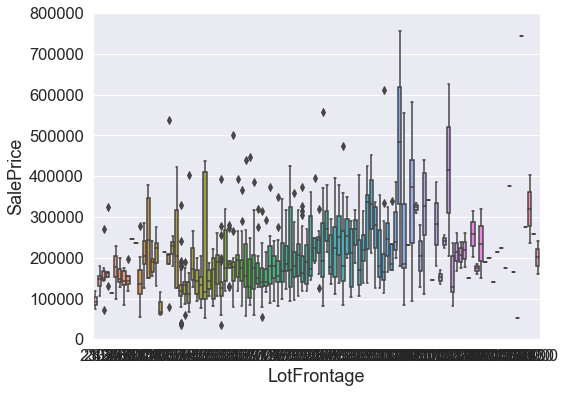

In [36]:
pair_box(data_train, TARGET_COLUMN, "LotFrontage")

In [37]:
missing_table = missing_values_percentage_table(data_train)

In [38]:
data_train[data_train["GarageCond"].isnull()
           & data_train["GarageType"].isnull()
          & data_train["GarageYrBlt"].isnull()
          & data_train["GarageFinish"].isnull()
          & data_train["GarageQual"].isnull()].shape

(81, 81)

Ok, features:\
    1.`PoolQC` - pool quality \
    2.`MiscFeature`- additional characteristic to house \
    3.`Alley` - acces to alley\
    4.`Fence` - fence quality \
    5.`LotFrontage` - honestly dunno what it is (Linear feet of street connected to property)

won't take their part in modeling: they are missing a lot of values and I think it's not the features that will strongly affect our target variable.

In `PoolQC`, `Alley`, `Fence` and `MiscFeature` absent values means that the feature is not presented in the record (for example, `NA` in `PoolQC` means there is no pool). They may also be missing due to their uselessness..

Features `GarageCond`, `GarageType`, `GarageYrBlt`, `GarageFinish` and `GarageQual` missing the values in the same 81 records. Previously we've got that `GrLivArea` has strong correlation with target and this variable is present in each record, so we will just delete the above features due to `GrLivArea` may substitute them (if it does not replace, then in any case it will strongly correlate with these variables).

The same logic we can apply to `BsmtExposure`, `BsmtFinType2`, `BsmtFinType1`, `BsmtCond` and `BsmtQual` becase we have strong correlated variable `TotalBsmtSF`.

`MasVrnType` and `MasVnrArea` (marsonry veneer - облицовка каменной кладки) missing only in 8 records, and I wouldn't say the variables are informative ones. I'll just have them deleted (records, not the feature per se).

`Electrical` missing in 1 record, so I'll also have the record deleted.

In [39]:
features_to_delete = [
    "PoolQC", "GarageType",
    "MiscFeature", "GarageYrBlt",
    "Alley", "GarageFinish",
    "Fence", "GarageQual",
    "FireplaceQu", "BsmtExposure",
    "LotFrontage", "BsmtFinType2",
    "GarageCond", "BsmtFinType1",
    "BsmtCond", "BsmtQual",
    "MasVnrArea", "MasVnrType"
]

prepared_data_train = data_train.drop(columns=features_to_delete)
prepared_data_test = data_test.drop(columns=features_to_delete)
prepared_data_train = prepared_data_train.dropna(subset=["Electrical"])
missing_values_bar(prepared_data_train)

No missing values found


# Handling outliers

We need to handle outliers because they can affect our model and thus we will get biased results.

Firstly, I've tried to use IQR filter. But this is a rough one. Due to the great variety of parameters there is a lot of outliers, and applying IQR filter

```python
Q1 = data_test.quantile(0.25)
Q3 = data_test.quantile(0.75)
IQR = Q3-Q1

prepared_data_train = prepared_data_train[~((prepared_data_train < (Q1 - 1.5 * IQR)) | (prepared_data_train > (Q3 + 1.5 * IQR))).any(axis=1)]
```
we losing a lot of information (approximately 350-400 records remains after filtering)

We need to come up with filter, that will remove **heavy** outliers and leave **light** ones untouched. Previously we've seen on plots that there are a few records that seems odd. Let's plot the graphs and remove outliers manually by observing the plots.

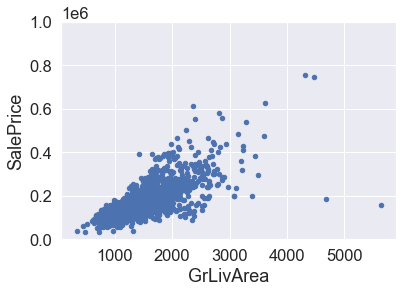

In [40]:
pair_dist(prepared_data_train, TARGET_COLUMN, "GrLivArea")

In [41]:
prepared_data_train = prepared_data_train[
    prepared_data_train["GrLivArea"] < 4600
]

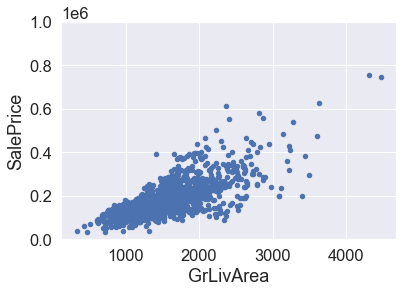

In [42]:
pair_dist(prepared_data_train, TARGET_COLUMN, "GrLivArea")

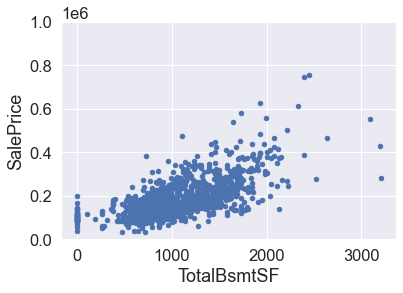

In [43]:
pair_dist(prepared_data_train, TARGET_COLUMN, "TotalBsmtSF")

In [44]:
prepared_data_train = prepared_data_train[
    prepared_data_train["TotalBsmtSF"] < 2800
]

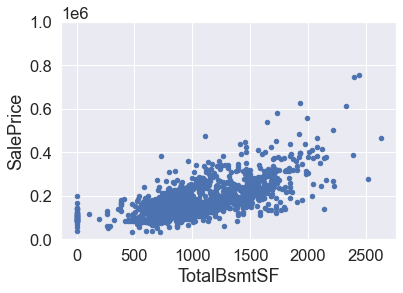

In [45]:
pair_dist(prepared_data_train, TARGET_COLUMN, "TotalBsmtSF")

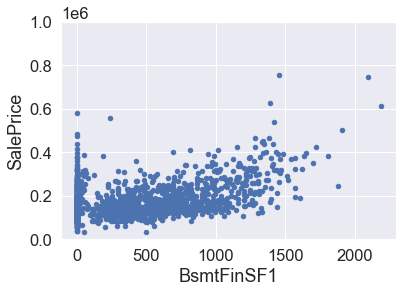

In [46]:
pair_dist(prepared_data_train, TARGET_COLUMN, "BsmtFinSF1")

In [47]:
prepared_data_train = prepared_data_train[
    prepared_data_train["BsmtFinSF1"] < 3000
]

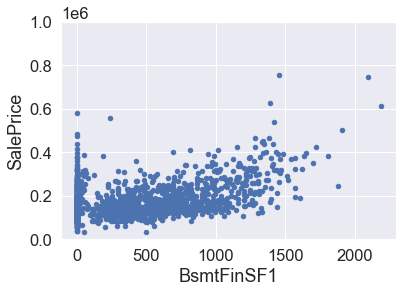

In [48]:
pair_dist(prepared_data_train, TARGET_COLUMN, "BsmtFinSF1")

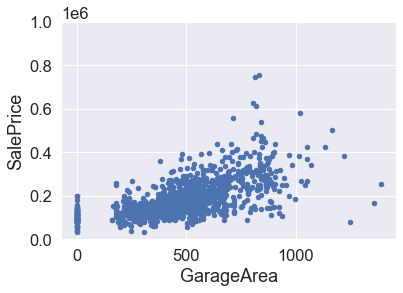

In [49]:
pair_dist(prepared_data_train, TARGET_COLUMN, "GarageArea")

In [50]:
prepared_data_train = prepared_data_train[
    prepared_data_train["GarageArea"] < 1200
]

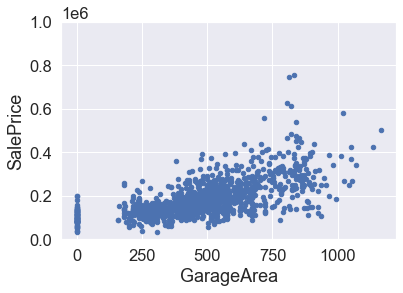

In [51]:
pair_dist(prepared_data_train, TARGET_COLUMN, "GarageArea")

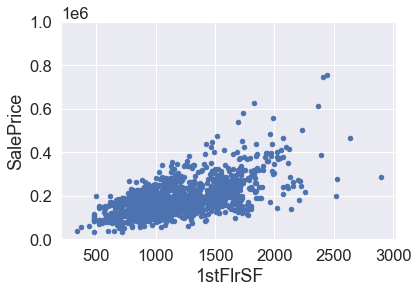

In [52]:
pair_dist(prepared_data_train, TARGET_COLUMN, "1stFlrSF")

In [53]:
prepared_data_train = prepared_data_train[
    prepared_data_train["1stFlrSF"] < 3000
]

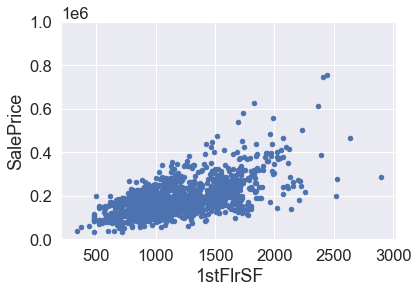

In [54]:
pair_dist(prepared_data_train, TARGET_COLUMN, "1stFlrSF")

Now we got rid of outliers and finally can get our transformed data

# Final transformation
Let's extract numerical and categorical column names and our target

In [55]:
def column_name_extractor(df):
    columns = list()
    for column in df.columns:
        columns.append(column)
        
    return columns
        
categorical_df = prepared_data_train.select_dtypes(include=["object"])
numerical_df = prepared_data_train.select_dtypes(include=["int64"])

TARGET = numerical_df["SalePrice"]
numerical_df = numerical_df.drop(columns=["SalePrice"])


categorical_features = column_name_extractor(categorical_df)
numerical_features = column_name_extractor(numerical_df)

Prepare pipelines for transforming

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


numerical_transformer = Pipeline(
        steps = [
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]
)

categorical_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)


prepr = ColumnTransformer(
     transformers = [
         ('numerical', numerical_transformer, numerical_features),
         ('categorical', categorical_transformer, categorical_features)
     ]
)

In [57]:
def transform(data):
    prepr.fit(data)
    return prepr.transform(data)

Now we can concut `prepared_data_train` with `prepared_data_test` and transform data. We are concutting dataframes because we have some categorical variables that do exists in `prepared_data_test` and not exists in `prepared_data_train` and vice versa.

In [58]:
whole_set = pd.concat([prepared_data_train, prepared_data_test])

whole_x = transform(whole_set)

# now split
train_x = whole_x[:prepared_data_train.shape[0]]
test_x = whole_x[prepared_data_train.shape[0]:]

train_y = TARGET
print(f"trainX:",train_x.shape)
print(f"testX:",test_x.shape)

print(f"trainY:",train_y.shape)
print()

trainX: (1450, 227)
testX: (1459, 227)
trainY: (1450,)



# MODELING
Let's use `train_test_split` to split our dataset into training set and validation set.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error


train_split_x, validate_x, train_split_y, validate_y =train_test_split(train_x, train_y, test_size=0.2)
print(f"Train: {train_split_x.shape}, {train_split_y.shape}")
print(f"Validation: {validate_x.shape}, {validate_y.shape}")

Train: (1160, 227), (1160,)
Validation: (290, 227), (290,)


The submissions are evaluated on **Root-Mean-Squared-Error** between the logarithm of the predicted value and the logarithm of the observed sales price, so we will define function to calculate **RMSE**

Also here is definition of plotting function to visualize predicted values vs true values.

In [60]:
def regression_plot(true_y, pred_y):

    fig, ax = plt.subplots() 

    ax.plot([true_y.min(), true_y.max()],
            [true_y.min(), true_y.max()],
            '--y', linewidth=2)
    ax.scatter(true_y, pred_y, alpha=0.1)

    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')

    plt.show()
    
def rmse(true_y, pred_y):
    return np.sqrt(mean_squared_log_error(true_y, pred_y))
    

# LinearRegression

> LinearRegression fits a linear model with coefficients ![title](img/linear_regr_coef.png)
 to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form:
![title](img/linear_regr_function.png)

In [61]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_split_x, train_split_y)

LinearRegression()

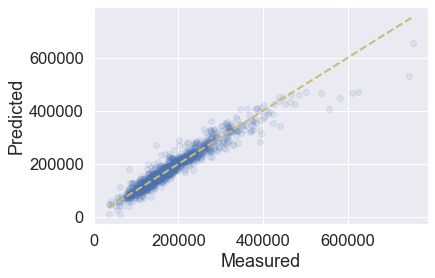

Model score:  0.869026255532326


In [62]:
preds = model.predict(train_x)
regression_plot(train_y, preds)
print("Model score: ",model.score(validate_x, validate_y))

# RandomForestRegressor

> A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 


In [63]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=10, random_state=1, criterion="mse")
model.fit(train_split_x, train_split_y)

RandomForestRegressor(max_depth=10, random_state=1)

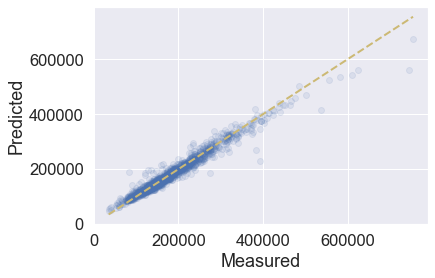

Model score:  0.8664407027417986
RMSE:  0.08633495461532265


In [64]:
preds = model.predict(train_x)
regression_plot(train_y, preds)
print("Model score: ",model.score(validate_x, validate_y))
print("RMSE: ", rmse(train_y, preds))

# Ridge

> Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares: 
![title](img/ridge_function.png)


In [65]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
from sklearn.linear_model import Ridge

model = Ridge(alpha=3, random_state=1)
model.fit(train_split_x, train_split_y)

Ridge(alpha=3, random_state=1)

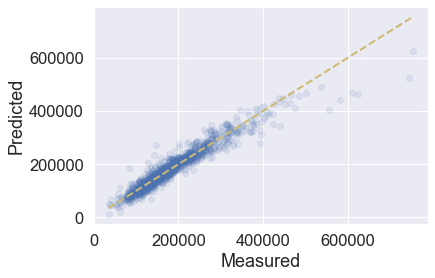

Model score:  0.8771816798874674
RMSE:  0.1262480052753605


In [66]:
preds = model.predict(train_x)
regression_plot(train_y, preds)
print("Model score: ",model.score(validate_x, validate_y))
print("RMSE: ", rmse(train_y, preds))

# ElasticNet
>ElasticNet is a linear regression model trained with both L1 and L2-norm regularization of the coefficients. The objective function to minimize is in this case ![title](img/elastic_net_function.png)




In [67]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(l1_ratio=0.9,random_state = 1)
model.fit(train_split_x,train_split_y)

ElasticNet(l1_ratio=0.9, random_state=1)

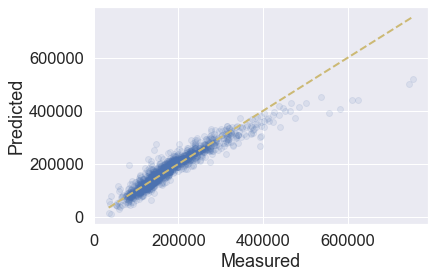

Model score:  0.8686748301915473
RMSE:  0.14400666254420097


In [68]:
preds = model.predict(train_x)
regression_plot(train_y, preds)
print("Model score: ",model.score(validate_x, validate_y))
print("RMSE: ", rmse(train_y, preds))

# RandomForestRegressor tuning using GridSearchCV

In [69]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]

# number of features to consider at every split
max_features = ["auto" ,"sqrt"]

# maximum numer of levels in tree
max_depth = [x for x in range(2,15)]

# minimum number of samples requred to split a node
min_samples_slit = [2,5]

# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

#method of selecting for training each tree
bootstrap = [True, False]

In [70]:
random_grid = {
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth":max_depth,
    "min_samples_split":min_samples_slit,
    "min_samples_leaf":min_samples_leaf,
    "bootstrap":bootstrap
}

In [71]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()

grid_search_cv = GridSearchCV(estimator=model, param_grid=random_grid,cv=3,verbose=2,n_jobs=4)

In [72]:
grid_search_cv.fit(train_split_x, train_split_y)

Fitting 3 folds for each of 2080 candidates, totalling 6240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    9.3s
[Parallel(n_jobs=4)]: Done 554 tasks      | elapsed:   29.1s
[Parallel(n_jobs=4)]: Done 999 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 1365 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 1810 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 2337 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done 2944 tasks      | elapsed:  7.1min
[Parallel(n_jobs=4)]: Done 3901 tasks      | elapsed:  8.4min
[Parallel(n_jobs=4)]: Done 4746 tasks      | elapsed: 10.5min
[Parallel(n_jobs=4)]: Done 5597 tasks      | elapsed: 14.4min
[Parallel(n_jobs=4)]: Done 6240 out of 6240 | elapsed: 17.7min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [73]:
grid_search_cv.best_params_

{'bootstrap': False,
 'max_depth': 13,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 80}

In [74]:
print(f"Train Accuracy: {grid_search_cv.score(train_split_x, train_split_y)}")
print(f"Train Accuracy: {grid_search_cv.score(validate_x, validate_y)}")

Train Accuracy: 0.9958380599558944
Train Accuracy: 0.8789411334348325


# Saving results
`RandomForestRegressor` gave us the best `RMSE` score, so we'll pick this model and use it to predict the results against `test_x` (test dataset)

In [75]:
final_prediction = grid_search_cv.predict(test_x)
pd.DataFrame({
    "Id": prepared_data_test["Id"],
    "SalePrice": final_prediction
}).to_csv("./sales_prices_result.csv",index=False)